**GUN Detection on custom dataset**

Checking GPU

In [1]:
!nvidia-smi

Tue Sep 19 05:13:46 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
# Download Ultralytics model

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [16]:
# Take a dataset from Roboflow

!mkdir {HOME}/datasets
%cd {HOME}/datasets
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="bTQwyiMiJnYlqhxjUKv8")
project = rf.workspace("mcd-fz7gc").project("gundetectionmcd")
dataset = project.version(9).download("yolov7")

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...
Exporting format yolov7pytorch in progress : 29.0%
Version export complete for yolov7pytorch format



Extracting Dataset Version Zip to GunDetectionMCD-9 in yolov7pytorch:: 100%|██████████| 52012/52012 [00:07<00:00, 6607.25it/s]


## Custom Training

In [17]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data='/content/datasets/GunDetectionMCD-9/data.yaml' epochs=25 imgsz=800 plots=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/GunDetectionMCD-9/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynam

In [23]:
!ls {HOME}/runs/detect/train8/

args.yaml					    train_batch22500.jpg
confusion_matrix.png				    train_batch22501.jpg
events.out.tfevents.1695101850.fd4a7fdb6a32.6959.0  train_batch22502.jpg
F1_curve.png					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg
PR_curve.png					    val_batch0_pred.jpg
R_curve.png					    val_batch1_labels.jpg
results.csv					    val_batch1_pred.jpg
results.png					    val_batch2_labels.jpg
train_batch0.jpg				    val_batch2_pred.jpg
train_batch1.jpg				    weights


/content


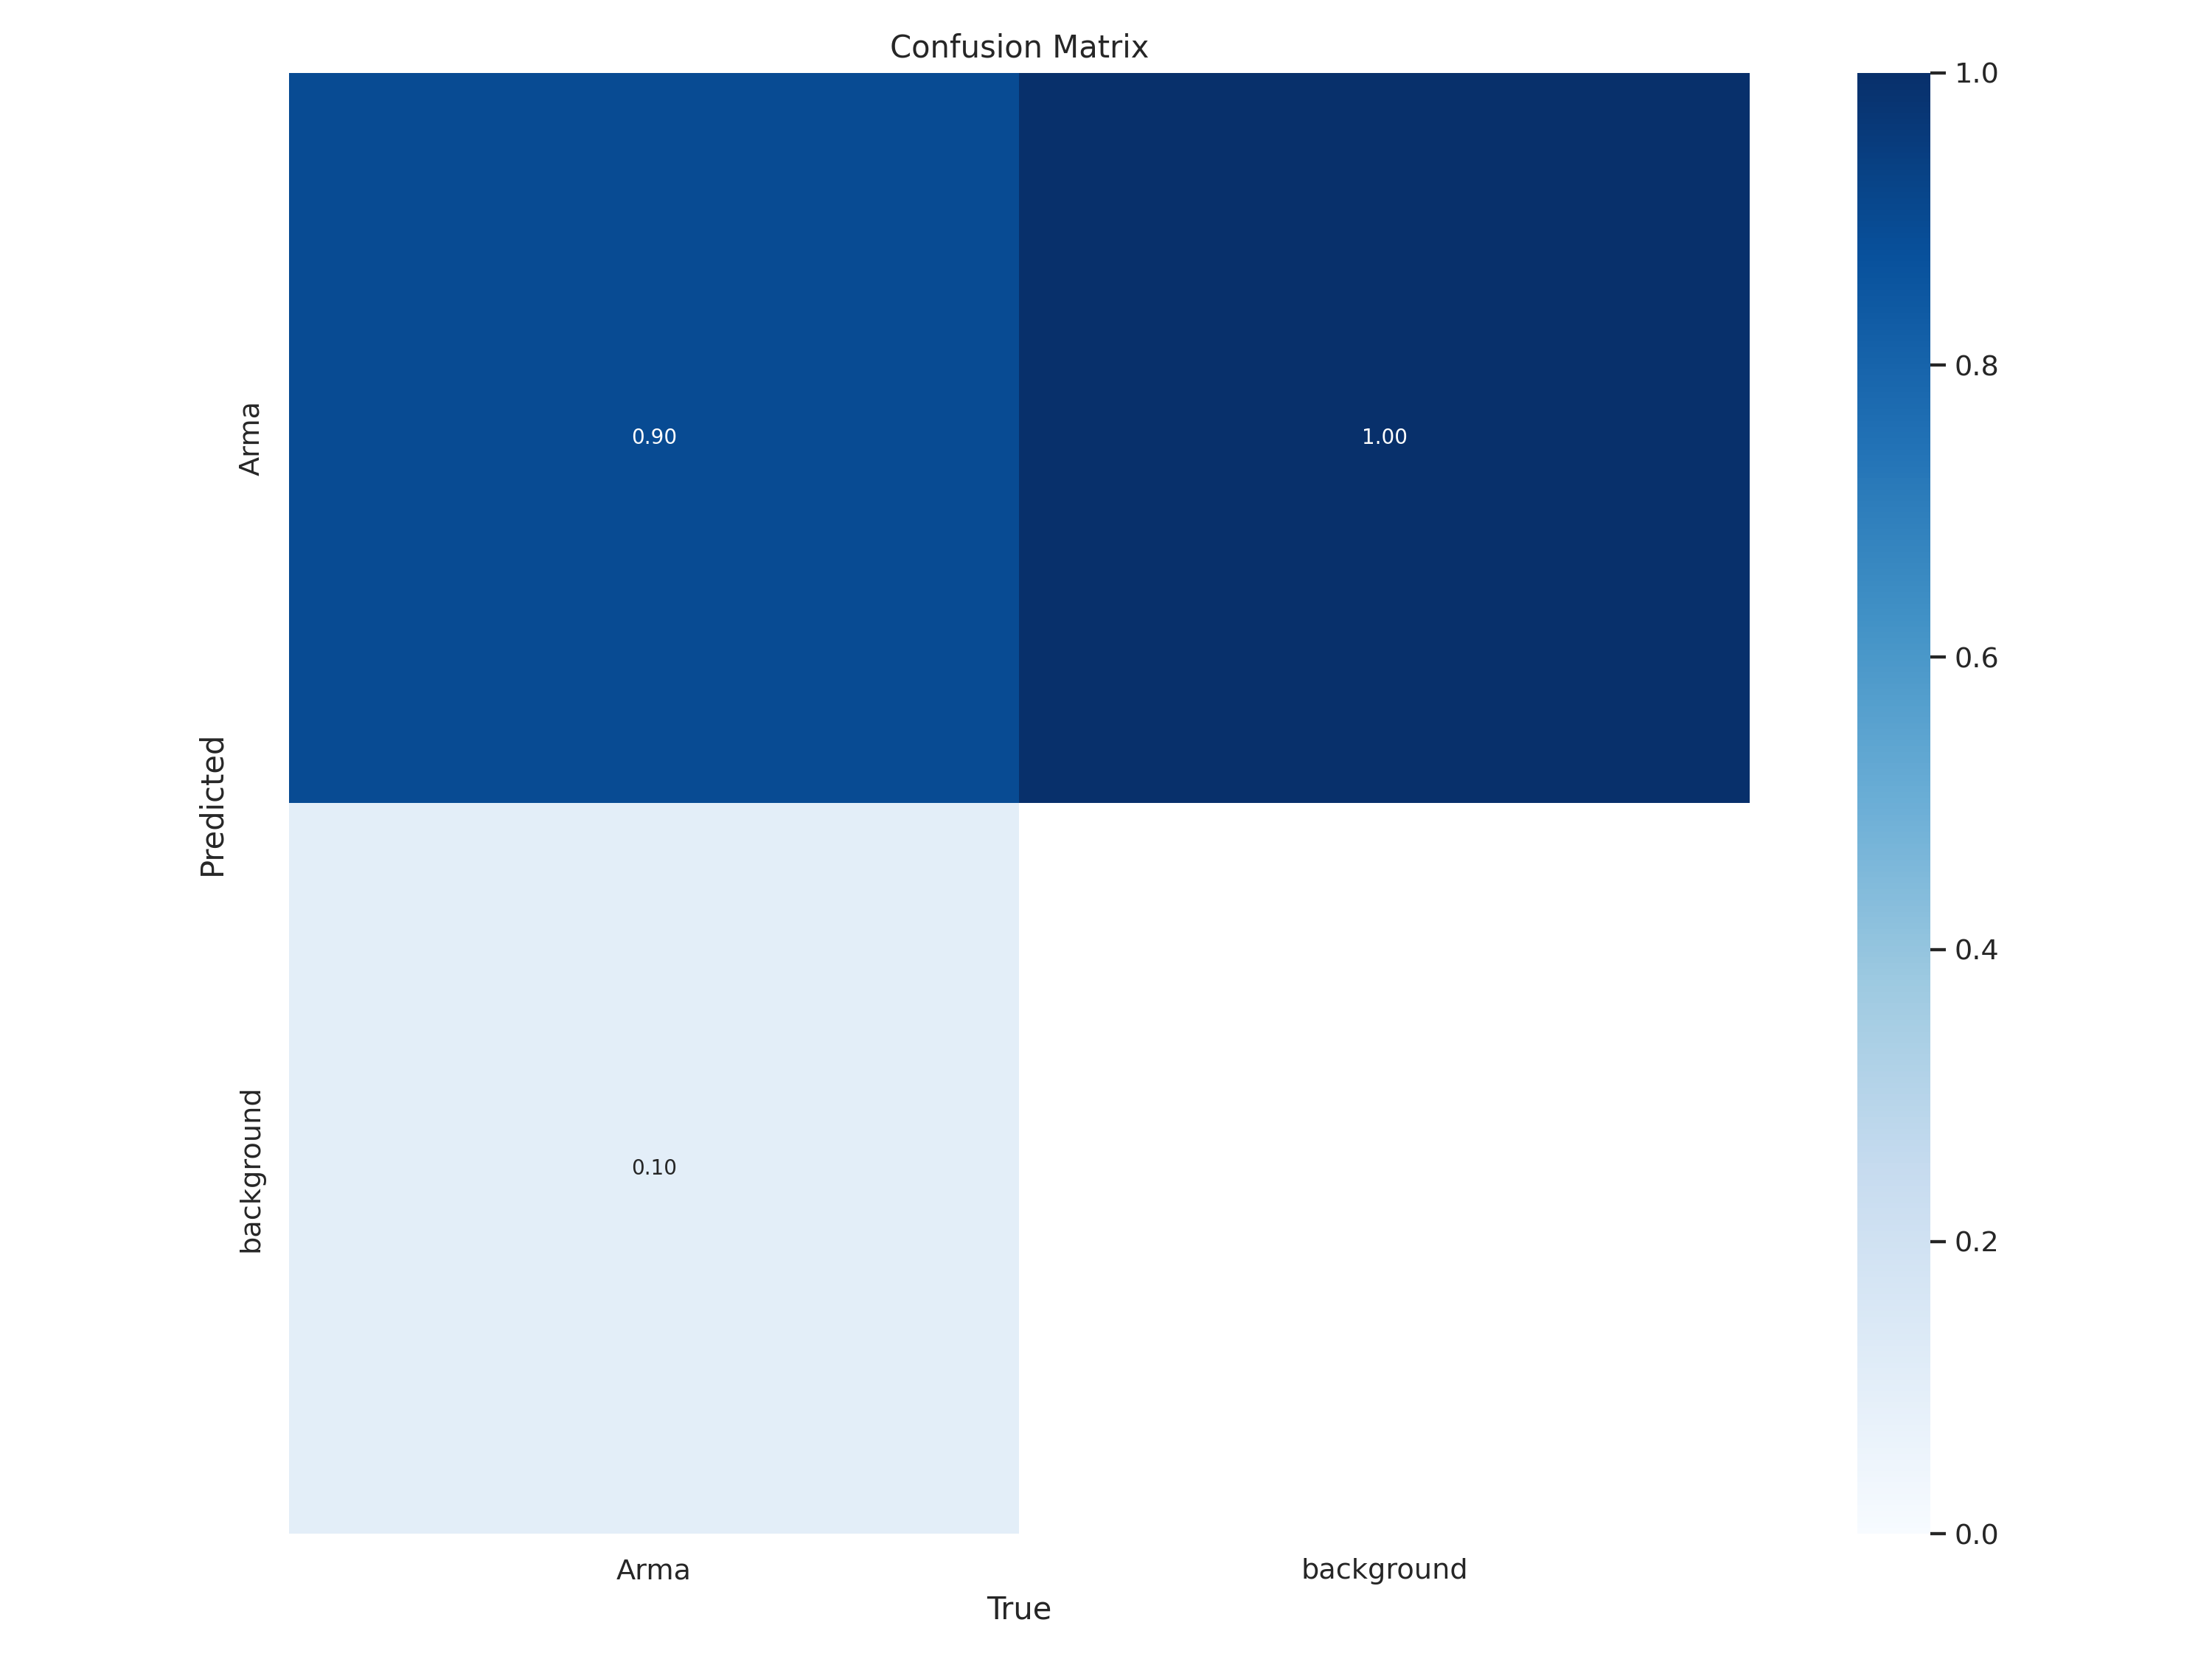

In [24]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train8/confusion_matrix.png', width=600)

/content


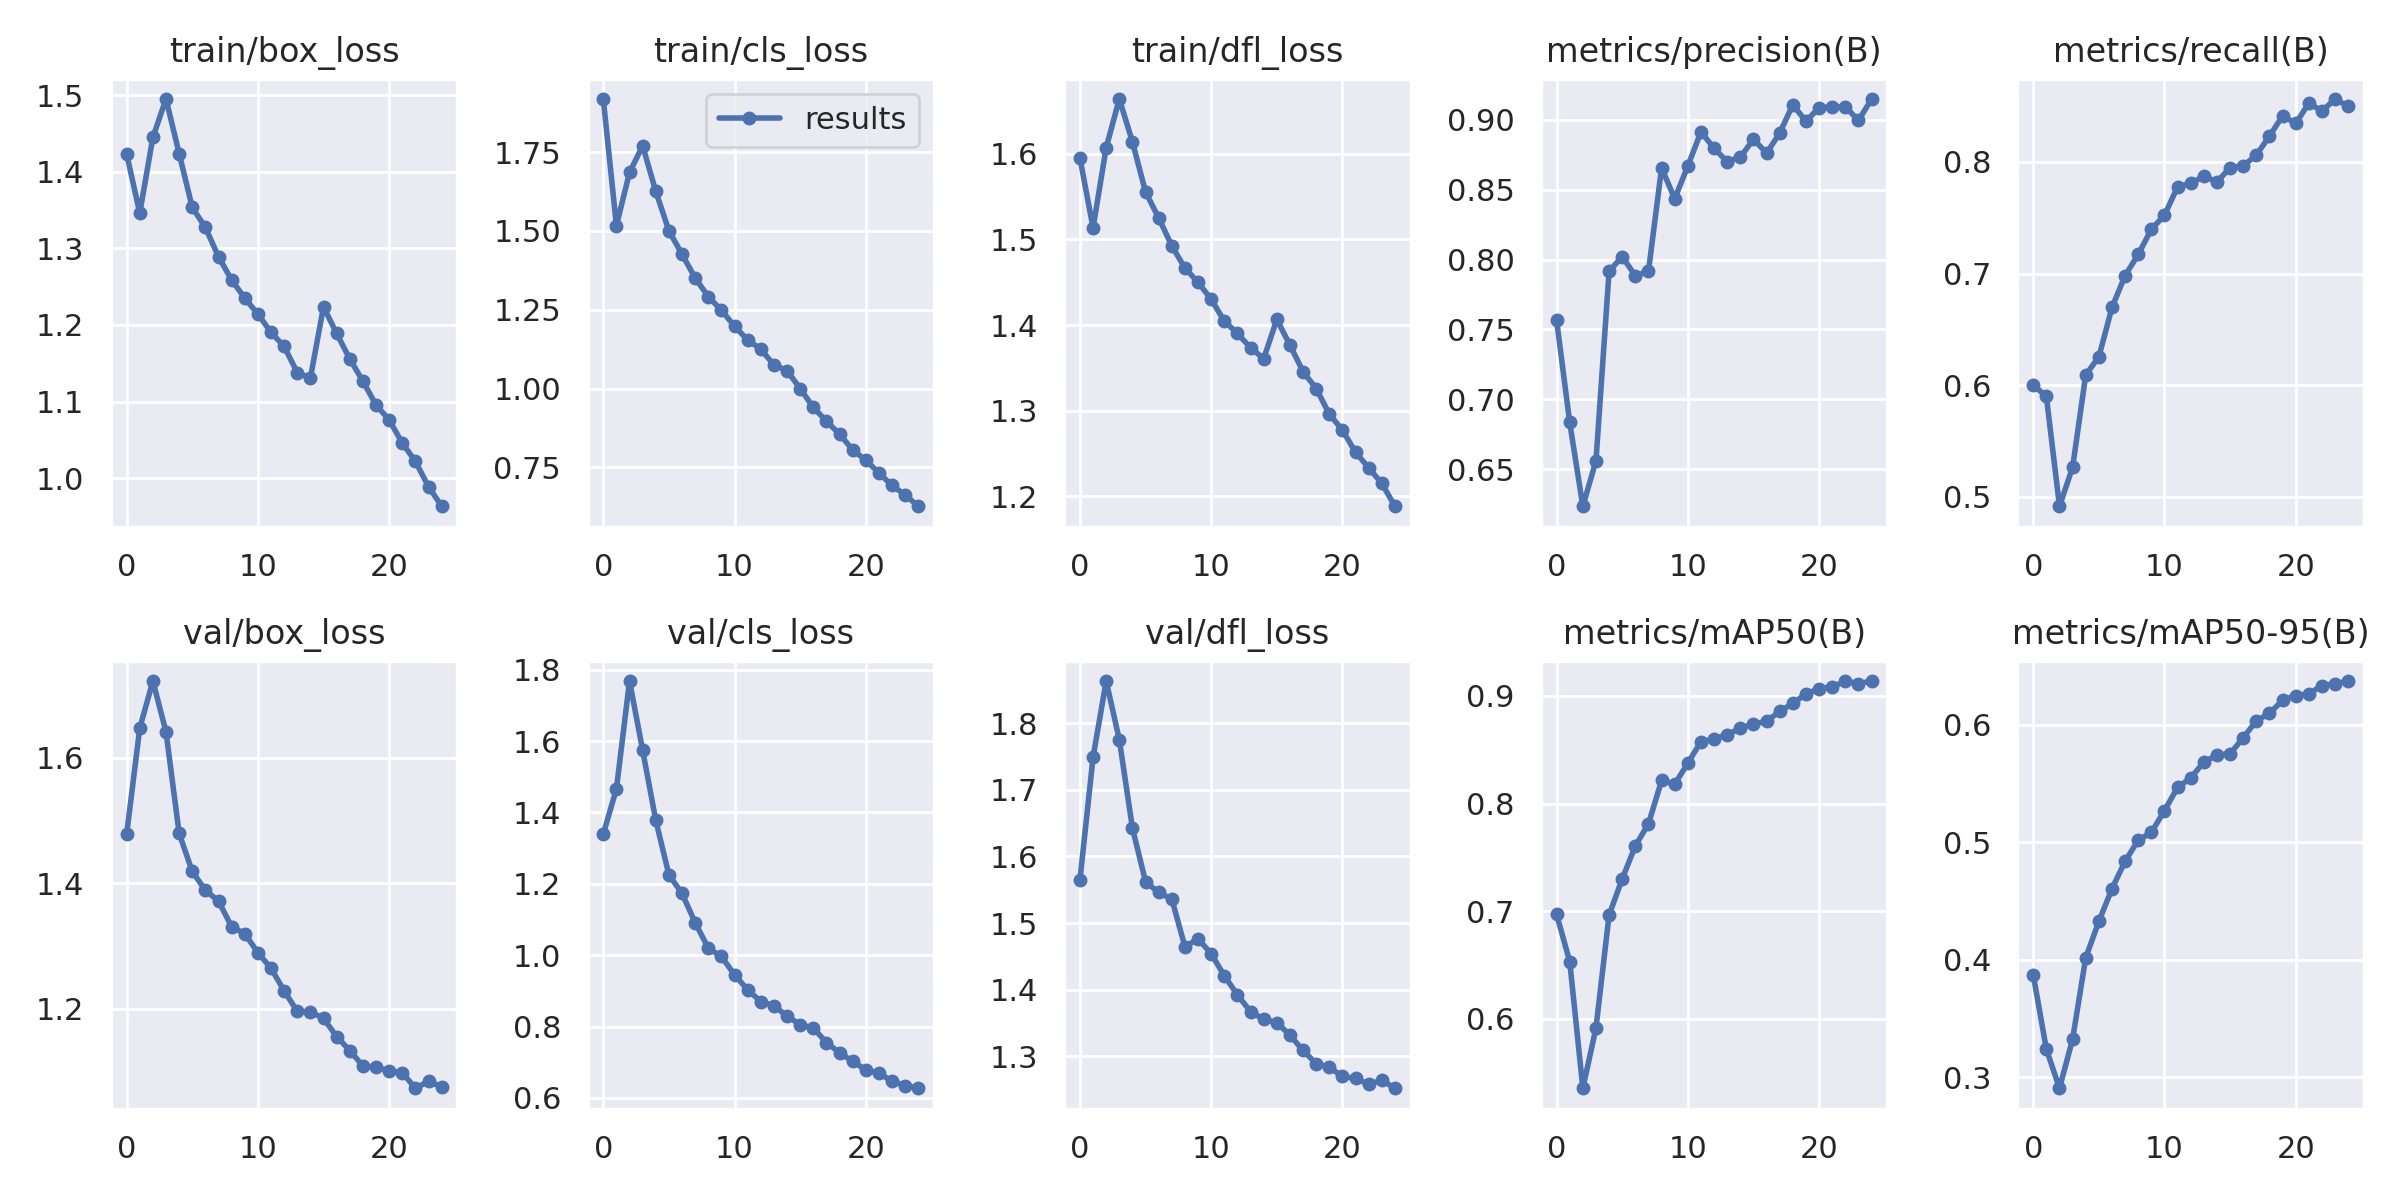

In [25]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train8/results.png', width=600)

/content


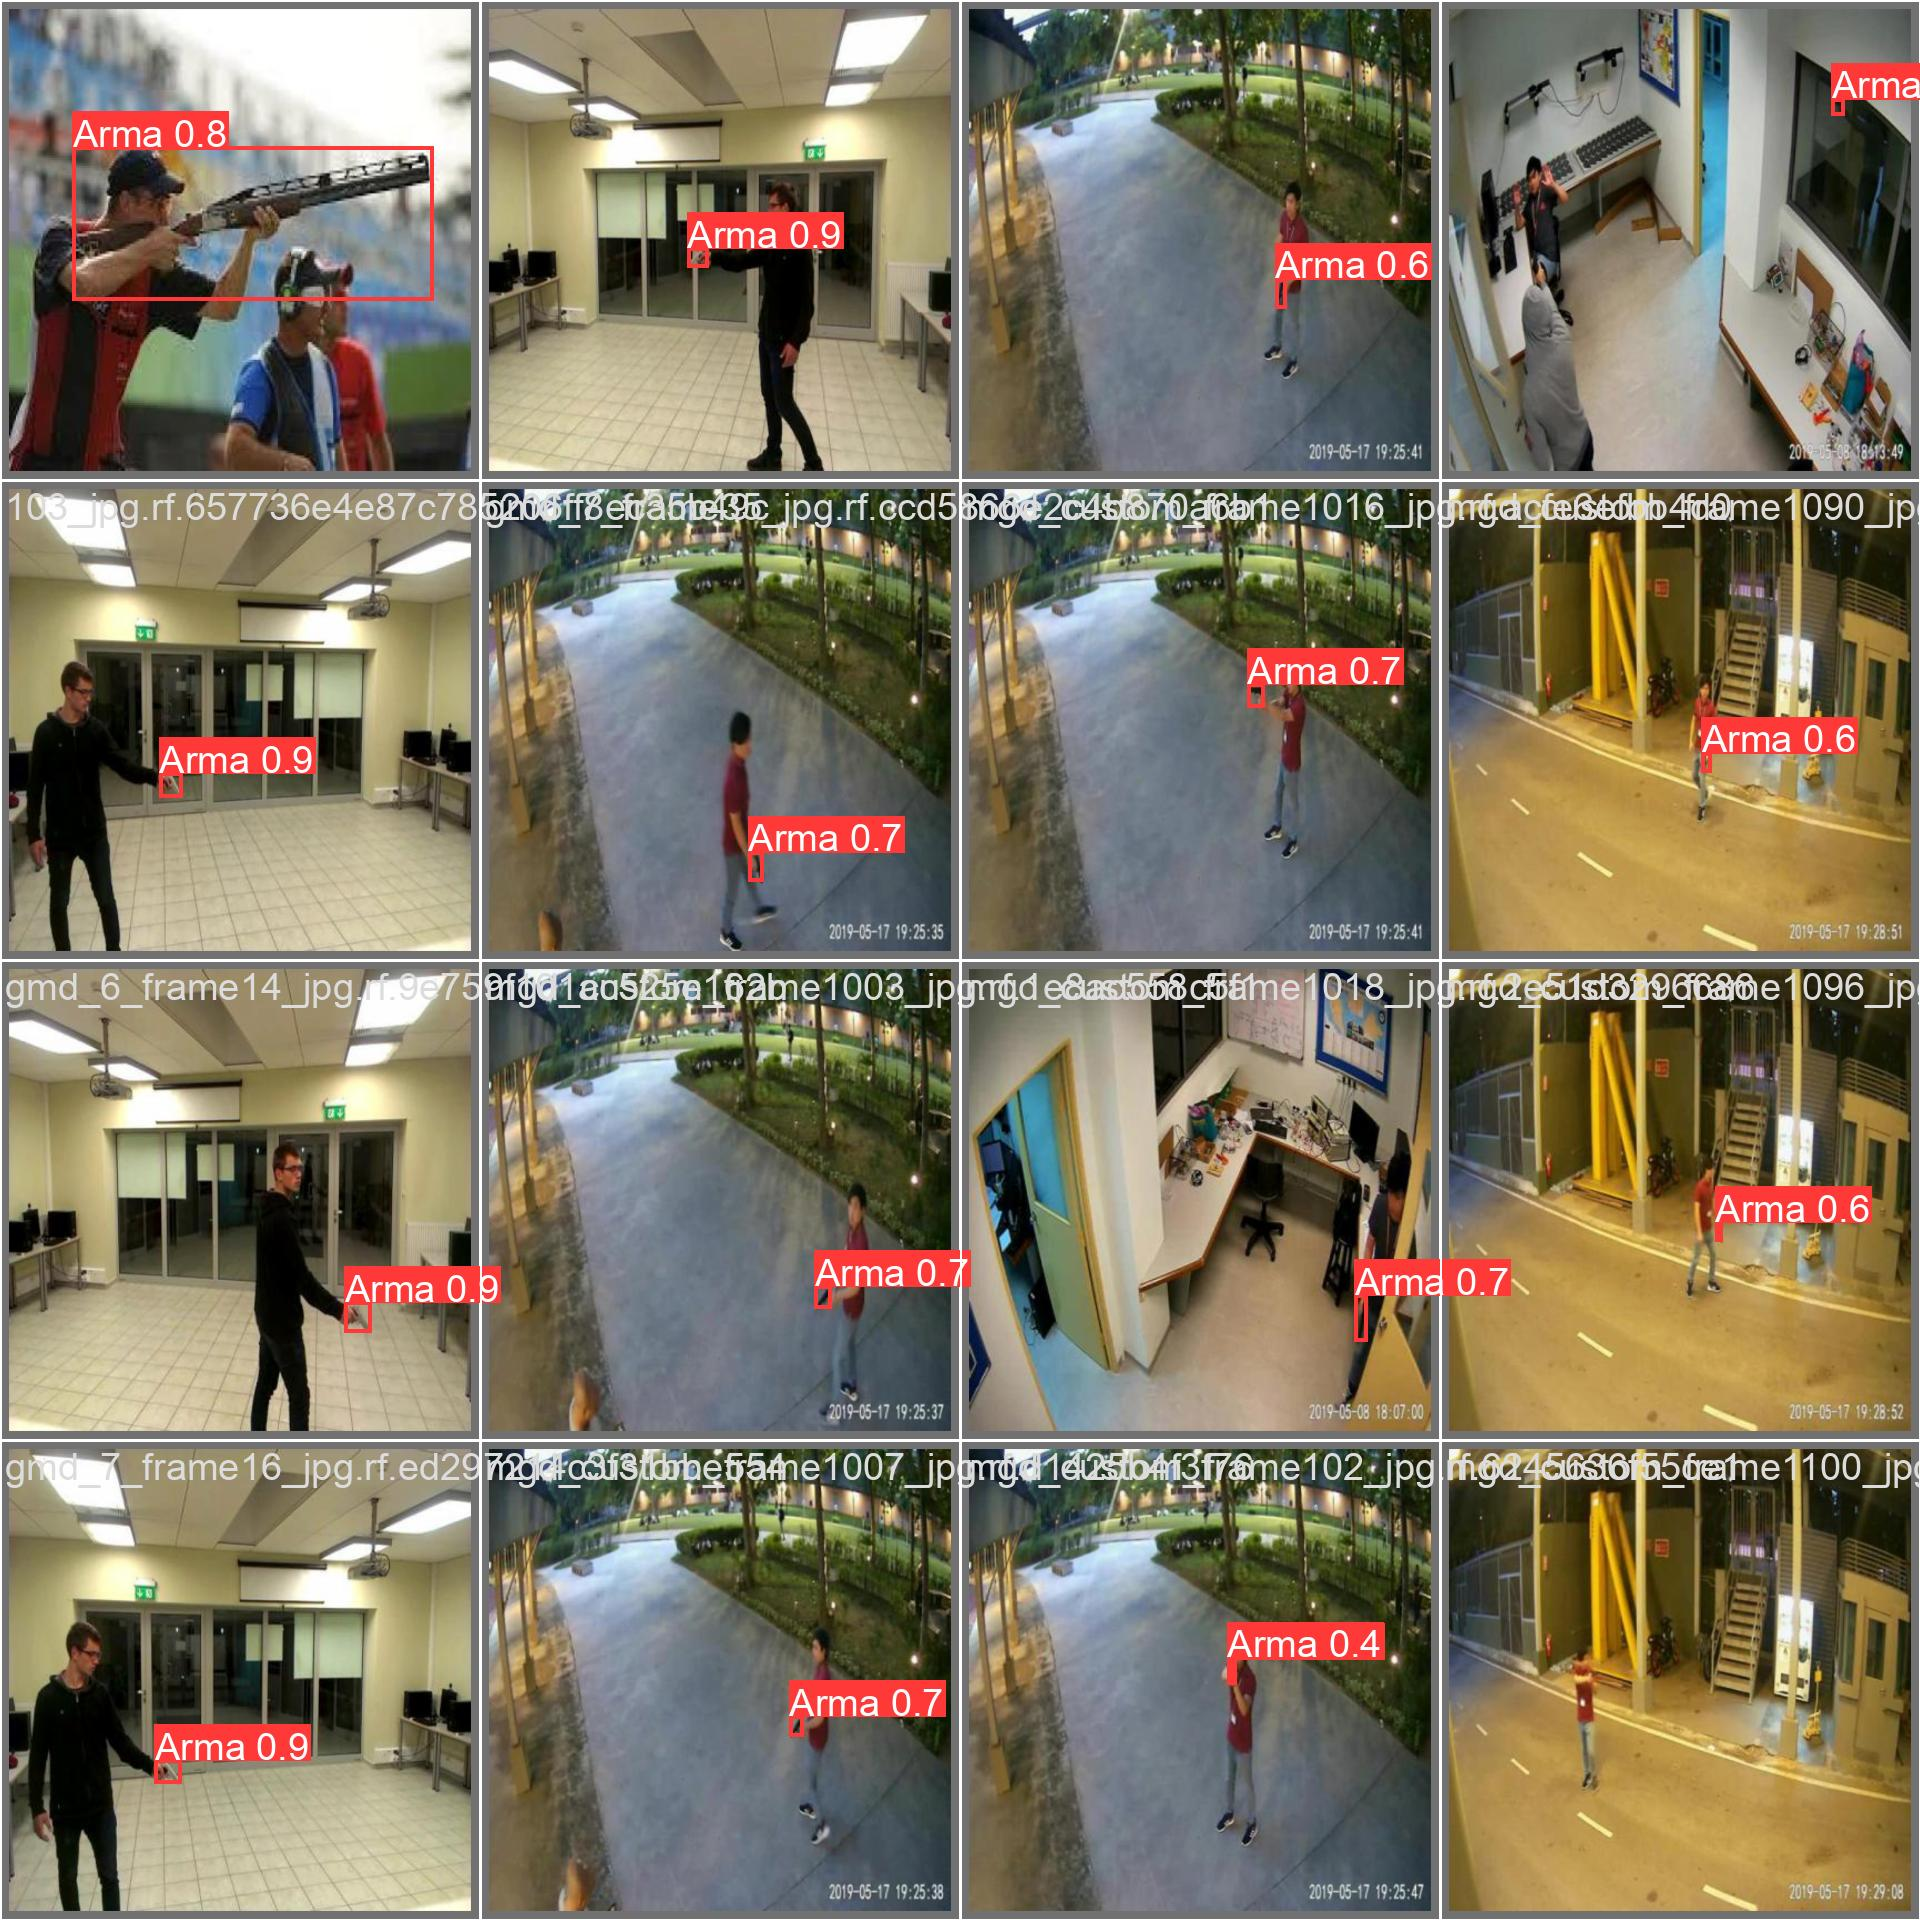

In [26]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train8/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [33]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train8/weights/best.pt data={dataset.location}/data.yaml

/content
2023-09-19 12:48:44.560326: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-19 12:48:45.827129: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/GunDetectionMCD-9/valid/labels.cache... 1000 images, 55 backgrounds, 0 corrupt: 100% 1000/1000 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 63/63 [00:24<00:00,  2.53it/s]
                   all       1000       1057      0.908      0.853      0.914      0.639
Speed: 0.8ms pre-process, 13

## Inference with Custom Model

In [27]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train8/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
2023-09-19 12:18:05.374402: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-19 12:18:06.448502: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
image 1/1000 /content/datasets/GunDetectionMCD-9/test/images/102_jpg.rf.4454f05406e105a0121c4df71f9473f6.jpg: 800x800 24.8ms
image 2/1000 /content/datasets/GunDetectionMCD-9/test/images/105_jpeg_jpg.rf.db4e6026ee801fe6eb38296a06e5e10a.jpg: 800x800 1 Arma, 24.7ms
image 3/1000 /content/datasets/GunDetectionMCD-9/test/images/109_jpeg_jpg.rf.495da48ab4eb5842bd2cbd846304a337.jpg: 800x800 1

In [28]:
!yolo task=detect mode=predict model='/content/runs/detect/train8/weights/best.pt' conf=0.25 source='/content/efg.mp4' save=True

2023-09-19 12:25:43.413136: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-19 12:25:44.490066: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
video 1/1 (1/141) /content/efg.mp4: 800x480 1 Arma, 73.2ms
video 1/1 (2/141) /content/efg.mp4: 800x480 1 Arma, 15.4ms
video 1/1 (3/141) /content/efg.mp4: 800x480 1 Arma, 15.4ms
video 1/1 (4/141) /content/efg.mp4: 800x480 15.4ms
video 1/1 (5/141) /content/efg.mp4: 800x480 15.4ms
video 1/1 (6/141) /content/efg.mp4: 800x480 15.4ms
video 1/1 (7/141) /content/efg.mp4: 800x480 15.4ms
video 1/1 (8/14

In [29]:
!yolo task=detect mode=predict model='/content/runs/detect/train8/weights/best.pt' conf=0.25 source='/content/abc.mp4' save=True

2023-09-19 12:27:12.460276: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-19 12:27:13.529989: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
video 1/1 (1/341) /content/abc.mp4: 480x800 1 Arma, 115.6ms
video 1/1 (2/341) /content/abc.mp4: 480x800 15.5ms
video 1/1 (3/341) /content/abc.mp4: 480x800 15.5ms
video 1/1 (4/341) /content/abc.mp4: 480x800 18.2ms
video 1/1 (5/341) /content/abc.mp4: 480x800 1 Arma, 15.5ms
video 1/1 (6/341) /content/abc.mp4: 480x800 2 Armas, 15.5ms
video 1/1 (7/341) /content/abc.mp4: 480x800 1 Arma, 18.0ms
video

In [30]:
!yolo task=detect mode=predict model='/content/runs/detect/train8/weights/best.pt' conf=0.25 source='/content/AdobeStock_497181486_Video_HD_Preview.mov' save=True

2023-09-19 12:31:37.595342: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-19 12:31:39.114329: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
video 1/1 (1/537) /content/AdobeStock_497181486_Video_HD_Preview.mov: 480x800 80.7ms
video 1/1 (2/537) /content/AdobeStock_497181486_Video_HD_Preview.mov: 480x800 15.5ms
video 1/1 (3/537) /content/AdobeStock_497181486_Video_HD_Preview.mov: 480x800 15.5ms
video 1/1 (4/537) /content/AdobeStock_497181486_Video_HD_Preview.mov: 480x800 15.5ms
video 1/1 (5/537) /content/AdobeStock_497181486_Video_HD

In [31]:
!yolo task=detect mode=predict model='/content/runs/detect/train8/weights/best.pt' conf=0.25 source='/content/AdobeStock_497668890_Video_HD_Preview.mov' save=True

2023-09-19 12:32:14.828713: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-19 12:32:15.876307: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
video 1/1 (1/161) /content/AdobeStock_497668890_Video_HD_Preview.mov: 480x800 7 Armas, 152.9ms
video 1/1 (2/161) /content/AdobeStock_497668890_Video_HD_Preview.mov: 480x800 3 Armas, 18.0ms
video 1/1 (3/161) /content/AdobeStock_497668890_Video_HD_Preview.mov: 480x800 5 Armas, 15.6ms
video 1/1 (4/161) /content/AdobeStock_497668890_Video_HD_Preview.mov: 480x800 3 Armas, 15.8ms
video 1/1 (5/161) /

In [39]:
import shutil

# Replace 'your_run_folder_path' with the actual path to your run folder
shutil.make_archive("/content/Gun_detection_run", 'zip', "/content/runs")


'/content/Gun_detection_run.zip'

In [40]:
from google.colab import files

# Replace 'run_folder.zip' with the actual name of your compressed file
files.download("/content/Gun_detection_run.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>